# US School Shooting Data Analysis
Sai Patel

# Introduction
As of April 13, 2023 there have been reportedly fourteen school shootings in the United States. School is place where children are meant to grow and learn as individuals to prepare them for the real. Parents send their children to school with the assurance that their child will grow, learn, and most importantly stay safe. However there has been real controversy as to whether schools have been safe for children due to the large number of school shooting incidents over the past few years. 

In this project we will be working through the data science lifecycle to analyze the amount of school shootings that occur in the United States. The lifecycle of data science has five main parts. First we will start with data collection which is the process of us gathering our data from a source. Next we will make the data tidy by getting rid of unneeded data and making it easy for us to make analysis upon. Then we will start data analysis and visualization. This is where we will us our tidy data to make visualizations and analysis on those visualizations. Then we will start doing hypothesis testing and linear regression to predict any future data trends and check whether our prediction is correct, Finally there is insight and policy change which is where we will try and see what can be done to either continue any insights we make or to try and change things for the future.

There is an extensive use of python data science libraries. Some recommended python libraries to get familar with include but are not limited to:
- numpy
- pandas
- matplotlib
- statsmodel.formula.api

Here are some reasources to familiarize yourself on these libraries:
- https://pandas.pydata.org/docs/user_guide/10min.html#min
- https://www.w3schools.com/python/numpy/numpy_intro.asp
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html

Familiarize yourself with some of these libraries and reference them as we go through the steps of the data science lifecycle.

# Part 1: Data Collection
We will be collecting data from a data base from Kaggle. We will first downlad the data sets from https://www.kaggle.com/datasets/ecodan/school-shootings-us-1990present?select=pah_wikp_combo.csv. This will download a CSV (Comma Seperated Value) file. We can then process the CSV file in our Jupyter Notebook using a CSV parser. Make sure the file in directory when running the script.

In [573]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as se
import statsmodels
import statsmodels.api as sm

Now we are getting the data for each school shooting that has happened in the US along with some details such as the date, city, type of school, fatalities, wounded, and much more from the pah_wikp_combo.csv file.

In [574]:
data2 = pd.read_csv('pah_wikp_combo.csv', dtype = object)
data2.head()

,Date,City,State,AreaType,School,Fatalities,Wounded,Dupe,Source,Desc,Unnamed: 10,Unnamed: 11
0,3/27/1990,Brooklyn,New York,NaN,C,0,1,NaN,Wikp,A black youth was taunted with racial slurs by...,NaN,NaN
1,5/20/1990,Centerville,Tennessee,suburban,HS,1,NaN,NaN,Pah,NaN,NaN,NaN
2,8/26/1990,Las Vegas,Nevada,urban,HS,1,NaN,NaN,Pah,NaN,NaN,NaN
3,9/11/1990,San Antonio,Texas,NaN,HS,0,3,NaN,Wikp,3 students were wounded when gunfire broke out...,NaN,NaN
4,1/8/1991,Richardson,Texas,urban,HS,0,NaN,NaN,Pah,NaN,NaN,NaN


# Part 2: Data Processing

Now we need to begin tidying the data up by removing certain columns and combining others together. This will ensure that each row is an observation and each column is a variable of that observation and that we are keeping the columns of variables that we are using for future visualization and analysis. 
First we will get rid of the unnecessary columns that are in the data2 dataframe that we have no intention of using. In this case the only columns we will need are the State, Fatalities, Wounded, and School columns. On top of that we will create a new column "Year" that will hold the value of the year the shooting took place. We did this by using a DatatimeIndex function to parse the "Date" column for the year and inserted it into the year column. 

In [575]:
data2['Year'] = pd.DatetimeIndex(data2['Date']).year
tidy = pd.DataFrame(data2[['Year', 'State', 'Fatalities', 'Wounded', 'School']])
tidy['State'] = tidy['State'].replace('District of Columbia', 'D.C.')
tidy['State'] = tidy['State'].replace('District Of Columbia', 'D.C.')
tidy['State'] = tidy['State'].replace('IA', 'Iowa')
tidy['Wounded'] = tidy['Wounded'].fillna(0)
tidy['Fatalities'] = tidy['Fatalities'].fillna(0)
tidy['School'] = tidy['School'].replace('C', 'College')
tidy['School'] = tidy['School'].replace('HS', 'High School')
tidy['School'] = tidy['School'].replace('MS', 'Middle School')
tidy['School'] = tidy['School'].replace('ES', 'Elementary School')
tidy.head()

,Year,State,Fatalities,Wounded,School
0,1990,New York,0,1,College
1,1990,Tennessee,1,0,High School
2,1990,Nevada,1,0,High School
3,1990,Texas,0,3,High School
4,1991,Texas,0,0,High School


# Part 3: Data Visualization and Analysis

For this next section we will be using our tidy data to create certain visualizations to help better understand certain trends and relationships visually. We will look into three different visualizations of the tidy data. One is the amount of school shootings for each year. The second is the number of school shootings in each state. The third is the number of wounded/killed during a school shooting in each year.

We will create a table to store the amount of shooting in each year. This will be done simply by looping though each row and incrementing a variable to store in each year. 

In [576]:
year_arr = np.unique(tidy['Year'])
year = pd.DataFrame(columns = ['Year', 'Number_of_Shootings'], index = np.arange(0, 34))
year['Year'] = year_arr
i = 0
curr = 0
for y in tidy['Year']:
    if y == year_arr[i]:
        curr += 1
    else:
        year.at[i, 'Number_of_Shootings'] = curr
        curr = 0
        i += 1
year.at[33, 'Number_of_Shootings'] = curr
year.head()

,Year,Number_of_Shootings
0,1990,4
1,1991,12
2,1992,18
3,1993,43
4,1994,31


Now that we have successfully extracted the amount of shootings over each year since 1990, we cna now make a visual representation of our data. We will be using the python library matplotlib to make this visual representation possible.

,Year,Number_of_Shootings
0,1990,4
1,1991,12
2,1992,18
3,1993,43
4,1994,31


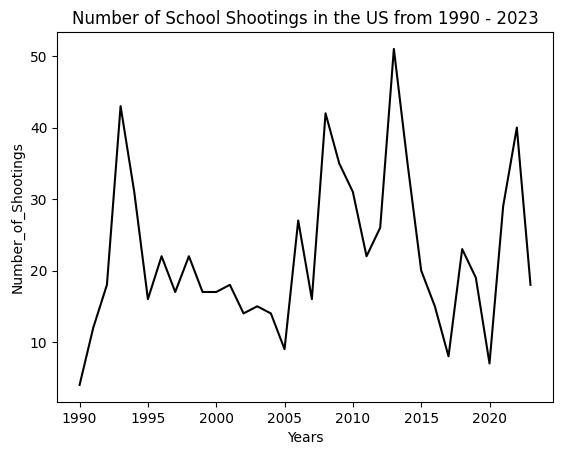

In [577]:
plt.plot(year['Year'], year['Number_of_Shootings'], color = 'black')
plt.title('Number of School Shootings in the US from 1990 - 2023')
plt.xlabel('Years')
plt.ylabel('Number_of_Shootings')
year.head()

From this graph we make many observations. One of which is that there is a maximum number of school shootings in the year 2014 with 50. There is also a minimum number of school shootings in the year 1990 with only 4. We can also see that there are many flucuations in the increase and decrease of school shooting incidents. Some years we can see an increase while others we may see a decrease. However something else to note is that outside of the year 1990, the next lowest total would be in the year 2020 with 7 total school shootings in the year. This is something to note because the 2020 school year was when many schools shut down to the coronavirus which may or may not have an impact on the total. 

In [578]:
print('Each year the average amount of school shootings is ' + str(year['Number_of_Shootings'].mean()) + 'school shootings per year.')

Each year the average amount of school shootings is 22.147058823529413school shootings per year.


Next we will create a dataframe with the amount of shootings in each state. This will be done by simply using a dictionary within within a loop iterating through each state in the database and incrementing the value of the dictionary with the key being the city.
Something to note about this dataframe and the year one is that if the year or state is in the database then an incident has occured in that year or state respectively. Therefore we would not have to worry about possibly missing any years or states. 

In [579]:
state_map = dict()
for y in tidy['State']:
    if y in state_map:
        state_map[y] = state_map[y] + 1
    else:
        state_map[y] = 1
state_map
state = pd.DataFrame(list(state_map.items()), columns = ['State', 'Number_of_Shootings'])
state.head()

,State,Number_of_Shootings
0,New York,23
1,Tennessee,35
2,Nevada,8
3,Texas,59
4,California,97


In [580]:
state[state['State'] == 'California']

,State,Number_of_Shootings
4,California,97


Now that we have the Number_of_Shootings for each state, we can now make a visualization of our data. In the previous visualization we used a line graph to visualize the number of shooting over time. However in this case we will be using a bar graph to visualize the number of shootings in each state. This is because bar graphs are great for showing categorical data which is what we are using here when looking at school shootings in each state.

Text(0.5, 0, 'Number_of_Shootings')

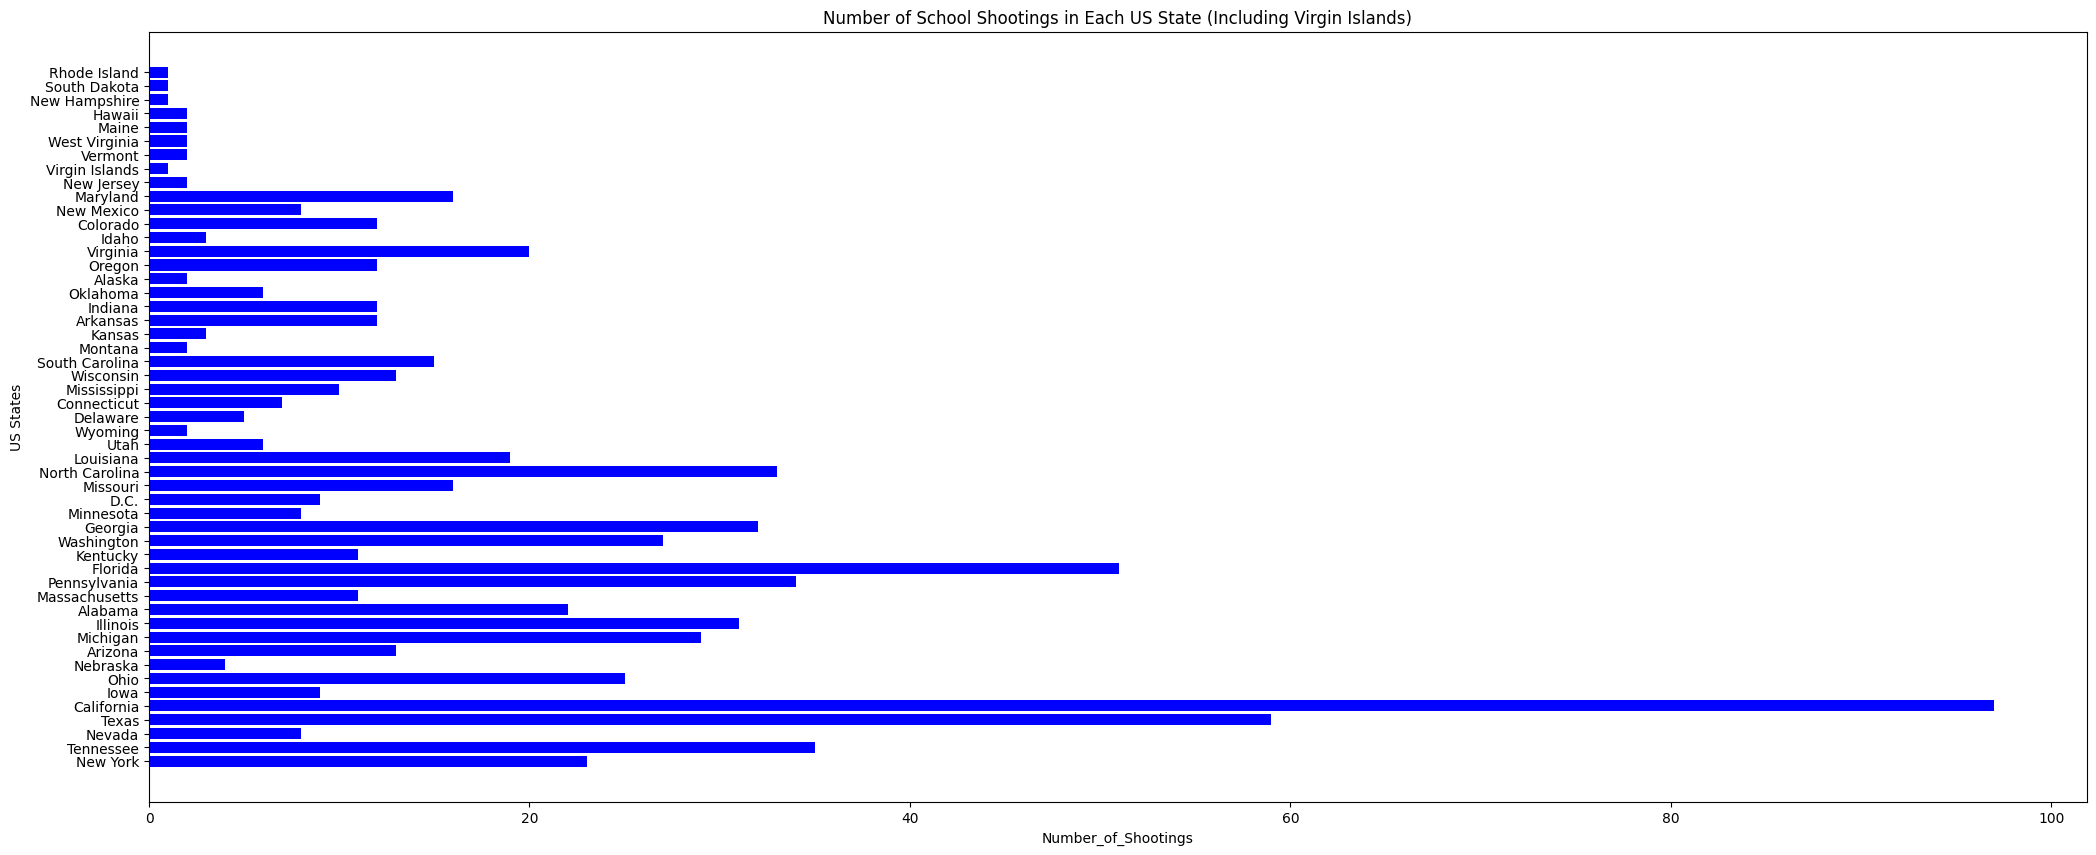

In [581]:
plt.figure(figsize = (25, 10))
plt.barh(state['State'], state['Number_of_Shootings'], color = 'blue')
plt.title('Number of School Shootings in Each US State (Including Virgin Islands)')
plt.ylabel('US States')
plt.xlabel('Number_of_Shootings')

From this data visualization we can see that the state with the largest number of school shootings is California with 97 total shootings from 1990 to 2023. There is also a minimum of 1 school shooting for the states Rhode Island, South Dakota, and New Hampshire along with the US territory Virigin Islands.

Something to note about this data is that the states with the largest number of school shootings also has some of the largest populations within the United States. For more in-depth information on the population of each state please visit: https://worldpopulationreview.com/states 

Now the final dataframe we will make is the amount of students killed/injured during these school shootings from the year 1990-2023.

In [582]:
wound = pd.DataFrame(columns = ['Year', 'Wounded', 'Fatalities'], index = np.arange(0, 34))
i, j = 0, 0
wound['Year'] = year_arr
curr1 = 0
curr2 = 0
for y in tidy['Year']:
    if y == year_arr[i]:
        curr1 += int(tidy.at[j, 'Wounded'])
        curr2 += int(tidy.at[j, 'Fatalities'])
        j += 1
    else:
        wound.at[i, 'Wounded'] = curr1
        wound.at[i, 'Fatalities'] = curr2
        curr1 = 0
        curr2 = 0
        i += 1
wound.at[i, 'Wounded'] = curr1
wound.at[i, 'Fatalities'] = curr2
wound.head()

,Year,Wounded,Fatalities
0,1990,4,2
1,1991,1,19
2,1992,25,17
3,1993,9,45
4,1994,3,30


Now we have make a visualization of the wounded and fatalities for each year. We will make two line graphs, one for wounded and one for fatalities since we are looking at data over time.

Text(0, 0.5, 'Number of People Wounded')

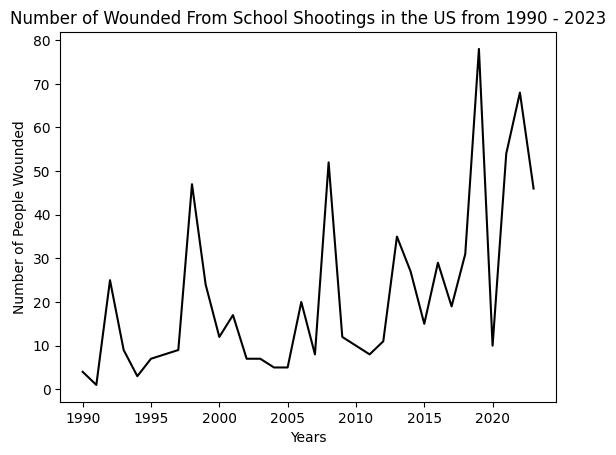

In [583]:
plt.plot(wound['Year'], wound['Wounded'], color = 'black')
plt.title('Number of Wounded From School Shootings in the US from 1990 - 2023')
plt.xlabel('Years')
plt.ylabel('Number of People Wounded')

We can see that from this visualization we can see an overall increase in wounded from school shootings over the years except for the year 2020 possibly because of the 2020 pandemic with a peak in 2019. But after 2020 there was a sharp increase in wounded from school shootings. 

Text(0, 0.5, 'Number of Fatalities')

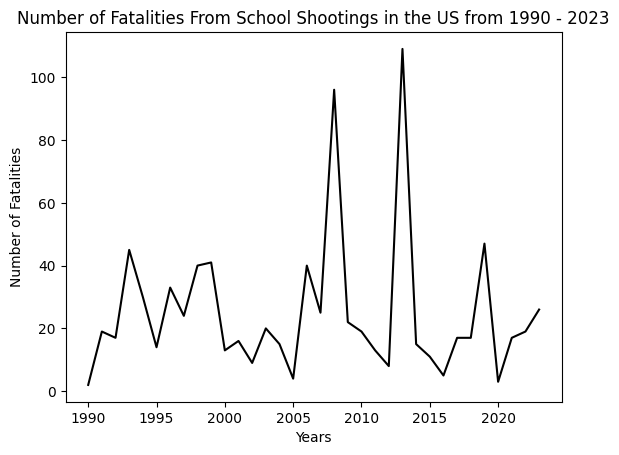

In [584]:
plt.plot(wound['Year'], wound['Fatalities'], color = 'black')
plt.title('Number of Fatalities From School Shootings in the US from 1990 - 2023')
plt.xlabel('Years')
plt.ylabel('Number of Fatalities')

We can see here that there is a peak in 2014 and minimums in 1990, 2005, and 2020. Again we can see that the pandemic could be a factor for the fatalities in the year 2020 since no schools were open at the time.

In [585]:
mean = wound['Wounded'].mean()
mean = round(mean, 2)
print("The average amount of people wounded from a school shooting within the United States is approximately " + str(mean) + 
      " wounded per year.")
mean = wound['Fatalities'].mean()
mean = round(mean, 2)
print("The average amount of people killed from a school shooting within the United States is approximately " + str(mean) + 
      " killed per year.")

The average amount of people wounded from a school shooting within the United States is approximately 21.26 wounded per year.
The average amount of people killed from a school shooting within the United States is approximately 25.03 killed per year.


One final way to visualize this data is to see which type of schools have been attacked. We will do this by grouping by the type of school each attack has been made.

In [586]:
school_map = dict()
for s in tidy['School']:
    if s in school_map:
        school_map[s] = school_map[s] + 1
    else:
        school_map[s] = 1
school = pd.DataFrame(list(school_map.items()), columns = ['School', 'Number_of_Shootings'])
school = school.drop([4, 5])
school

,School,Number_of_Shootings
0,College,165
1,High School,451
2,Middle School,95
3,Elementary School,62


Now that we have our data we will make a bar graph displaying the different amount of shootings in different schools throughout the years, throughout every state. This is because we are not comparing against time and we are looking at the different categories of the school shooting which is discrete.

Text(0, 0.5, 'Number of Shootings')

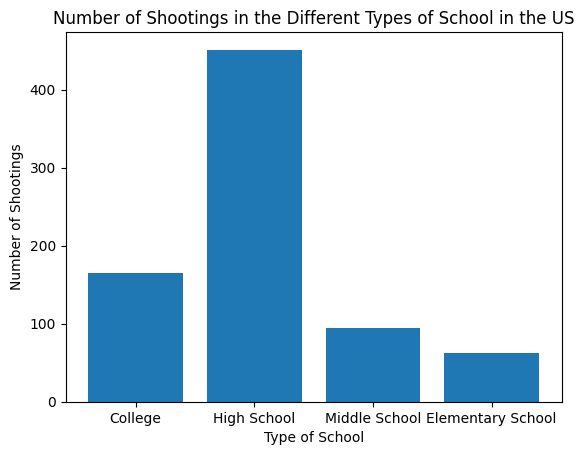

In [587]:
plt.bar(school['School'], school['Number_of_Shootings'])
plt.title('Number of Shootings in the Different Types of School in the US')
plt.xlabel('Type of School')
plt.ylabel('Number of Shootings')

What we can see here is that the majority of the school shootings occured in high school by a drastic margin compared to the other different types of schools.

# Part 4: Linear Regression, Hypothesis Testing, & Machine Learning

Now that we have our analysis is done we can start doing linear regression and test our predictions. When doing a linear regression, we're taking data that is already there and making future predicitons on the patterns from the data we already have. We are going to take a linear regression of just the school shootings over the years data and compare it to another regression when taking account States using a f test. For more information on linear regression please refer to this article: 
https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/#:~:text=Linear%20regression%20is%20a%20type,line%20that%20describes%20the%20relationship.

Hypothesis:

I predict that if we can account more factors such as year and state, there will be a more accurate linear model compared to accounting only for the year.

First we will create the linear regression model for the school shootings over the years 1990 - 2023. To do this we will be using a linear regression library called LinearRegression. This library will allow us to make a model along with giving us the ability to predict future values.

Text(0.5, 1.0, 'Number of School Shootings from 1990-2023 with Linear Regression')

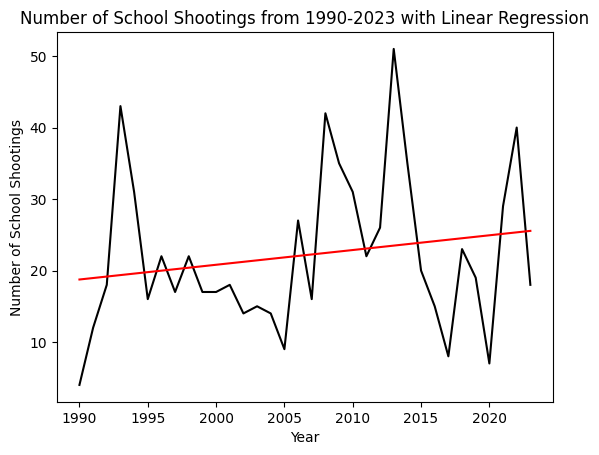

In [588]:
reg = linear_model.LinearRegression()
x_vals = [[x] for x in year['Year'].values]
y_vals = [[y] for y in year['Number_of_Shootings'].values]
lin_fit = reg.fit(x_vals, y_vals)
new_data = []
for x in year['Year'].values:
    new_data.append(lin_fit.predict(x.reshape(-1,1))[0][0])
year['Predicted Shootings'] = pd.Series(new_data, index = year.index)
plt.plot(year['Year'], year['Number_of_Shootings'], color='black')
plt.plot(year['Year'], year['Predicted Shootings'], color='red')
plt.xlabel("Year")
plt.ylabel("Number of School Shootings")
plt.title("Number of School Shootings from 1990-2023 with Linear Regression")

What we can see here from this linear regression line in red is that the amount of school shootings have been increasing over the years at a small rate. 

In [589]:
num = year['Number_of_Shootings'].to_numpy()
num = num.astype('float64')
year['Number_of_Shootings'] = num
stat1 = sm.formula.ols(formula= 'Number_of_Shootings ~ Year', data = year).fit()
stat1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number_of_Shootings   R-squared:                       0.034
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     1.139
Date:                 Mon, 08 May 2023   Prob (F-statistic):              0.294
Time:                         15:33:32   Log-Likelihood:                -128.89
No. Observations:                   34   AIC:                             261.8
Df Residuals:                       32   BIC:                             264.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -391.4157    387.484     -1.010      0.320   -1180.694     397.863
Year           0.2061      0.193      1.067      0.294      -0.187       0.599
==============================================================================
Omnibus:                        4.199   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                3.233
Skew:                           0.752   Prob(JB):                        0.199
Kurtosis:                       3.147   Cond. No.                     4.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For this next regression we will check to see whether we will a more accurate regression model if we were to consider the states that the school shootings occured in. My hypothesis is that considering the states that the school shootings occured will create a more accurate regression model compared to not considering the states since we are considering more factors to create a more precise model.

In [590]:
tidy = tidy[['Year', 'State']]
tidy = tidy.groupby(['Year', 'State']).size()
tidy = tidy.reset_index()
tidy['Number_of_Shootings'] = tidy[0]
tidy = tidy.drop(0, 1)
stat2 = sm.formula.ols(formula = 'Number_of_Shootings ~ Year * State', data = tidy).fit()
stat2.summary()

/var/folders/y4/4t7_1vnd7l5f5ynstwhp4sn40000gn/T/ipykernel_48587/890968182.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tidy = tidy.drop(0, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Number_of_Shootings   R-squared:                       0.277
Model:                             OLS   Adj. R-squared:                  0.080
Method:                  Least Squares   F-statistic:                     1.406
Date:                 Mon, 08 May 2023   Prob (F-statistic):             0.0166
Time:                         15:33:32   Log-Likelihood:                -601.05
No. Observations:                  426   AIC:                             1386.
Df Residuals:                      334   BIC:                             1759.
Df Model:                           91                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -83.5224     76.989     -1.085      0.279    -234.967      67.923
State[T.Alaska]               1.735e-07   3.16e-07      0.549      0.584   -4.49e-07    7.96e-07
State[T.Arizona]                99.0897    107.481      0.922      0.357    -112.336     310.516
State[T.Arkansas]               89.8091    129.253      0.695      0.488    -164.444     344.062
State[T.California]            132.9532     88.328      1.505      0.133     -40.795     306.702
State[T.Colorado]              204.9525    130.883      1.566      0.118     -52.506     462.411
State[T.Connecticut]           151.3321    130.756      1.157      0.248    -105.876     408.540
State[T.D.C.]                  104.8381    119.667      0.876      0.382    -130.559     340.235
State[T.Delaware]               84.5224    119.430      0.708      0.480    -150.408     319.453
State[T.Florida]                83.4946     93.559      0.892      0.373    -100.544     267.533
State[T.Georgia]               159.2609    101.215      1.573      0.117     -39.839     358.361
State[T.Hawaii]               3.812e-08   2.88e-07      0.132      0.895   -5.29e-07    6.05e-07
State[T.Idaho]                 176.3860    163.958      1.076      0.283    -146.134     498.906
State[T.Illinois]               93.6642     96.549      0.970      0.333     -96.256     283.584
State[T.Indiana]                81.2815    123.971      0.656      0.513    -162.581     325.144
State[T.Iowa]                  123.0441    103.940      1.184      0.237     -81.416     327.504
State[T.Kansas]                 84.5224    129.524      0.653      0.514    -170.263     339.307
State[T.Kentucky]              127.9005    106.676      1.199      0.231     -81.940     337.741
State[T.Louisiana]              78.8984    110.557      0.714      0.476    -138.578     296.375
State[T.Maine]                  84.5224    226.384      0.373      0.709    -360.796     529.841
State[T.Maryland]               94.9533    122.768      0.773      0.440    -146.543     336.450
State[T.Massachusetts]         158.3755    125.521      1.262      0.208     -88.536     405.287
State[T.Michigan]              118.0016     94.480      1.249      0.213     -67.849     303.852
State[T.Minnesota]              73.4734    118.685      0.619      0.536    -159.992     306.938
State[T.Mississippi]            59.8887    118.176      0.507      0.613    -172.575     292.352
State[T.Missouri]              162.0056    101.353      1.598      0.111     -37.364     361.375
State[T.Montana]              2.117e-07   3.31e-07      0.639      0.523    -4.4e-07    8.63e-07
State[T.Nebraska]               14.4393    173.425      0.083      0.934    -326.704     355.583
State[T.Nevada]                 70.6261    125.327      0.564    

Now we have the different regression models for when the states are accounted for and when they are not. To check and see which one is the most accurate linear model we will need to run an f test on it to see which one will produce a higher f test. 

In [591]:
print("F test value for Model 1:", stat1.fvalue)
print("F test value for Model 2:", stat2.fvalue)

F test value for Model 1: 1.1391639343826152
F test value for Model 2: 1.4056969659655814


We can see here that the fvalue for model one is lower than the fvalue for model two. This means that the model that accounts for the state at which the school shooting occurs in along with the year is more accruate than the one that does not account for the state and only accounts for the year.

# Part 5: Insight and Policy Decision

At this stage of the data science lifecycle we must analyze the data to uncover patterns, trends, and relationships, and look for insights that can help address the original problem or question. The insights may be used to identify areas of improvement or optimization, to identify risks or opportunities, or to develop new strategies or solutions. 

From our dataset we can see a trend in that school shootings are increasing over time within the country and that there is much needed imporovement for our country. Somwthing else to note is that the states with the highest population in the US have the most school shootings from 1990 - 2023. It is important to know that these viale acts affect our community in so many ways that there is a need for certain actions to take place. In order for this trend to stop we must inform our representatives, federal or state, about these situations and demand some sort of action to take place. I highly recommend you share this dataset with your representatives to explain to them the rising problem that will only grow if action is not taken soon. 

I highly encourage any reader to look over the dataset again as there is far more information available such as descriptions of attackers, cities of the incident, and the type of area these incidents have occurred in. I also encourage you all to look into other datasets that might have more features or more information as there is more information to be discovered about this situation. With this we as data scientists can make a positive difference in the US.

# References
Data Science Info
- https://pandas.pydata.org/docs/user_guide/10min.html#min
- https://www.w3schools.com/python/numpy/numpy_intro.asp
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html
- https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/#:~:text=Linear%20regression%20is%20a%20type,line%20that%20describes%20the%20relationship. 
- https://statisticsbyjim.com/anova/f-tests-anova/#:~:text=An%20F%2Dvalue%20is%20the,Learn%20more%20about%20Test%20Statistics.

Dataset
- https://www.kaggle.com/datasets/ecodan/school-shootings-us-1990present?select=pah_wikp_combo.csv

Background Information
- https://worldpopulationreview.com/states 
- https://www.edweek.org/leadership/a-year-of-covid-19-what-it-looked-like-for-schools/2021/03
